In [1]:
from MIMIC import MIMIC

import numpy as np

## Zadanie 2. (4 punktów)
Zaimplementuj algorytm MIMIC, przedstawiony w ogólnym zarysie na wykładzie, a dokładnie opisany w artykule "MIMIC: Finding Optima by Estimating Probability Densities" (link do artykułu na stronie wykładu). Przeanalizuj działanie algorytmu na wybranych benchmarkach (w tym na problemie KDeceptiveOneMax) i otrzymane wyniki.

In [2]:
def deceptive(population):
    evals = population.sum(axis=1)
    evals[evals == 0] = population.shape[1] + 1
    return evals

def k_deceptive(population, k):
    idx_splits = np.linspace(0, population.shape[1], k+1).astype(int)
    evals = np.zeros(population.shape[0])
    
    for i in range(1, len(idx_splits)):
        evals += deceptive(population[:, idx_splits[i-1] : idx_splits[i]])
        
    return -evals

In [32]:
def test(d):
    for k in [1, 5, 10]:
        mimic = MIMIC(N=10000, d=d, domain=(0, 1), epsilon=0.01, 
                      cost_func=lambda p: k_deceptive(p, k))
        mimic.run()
        mimic.plot_costs(f'for k={k}\n min:{mimic.min_cost.min()} / {-(d+k)}')

MIMIC: 100%|██████████| 50/50 [00:00<00:00, 293.56it/s]


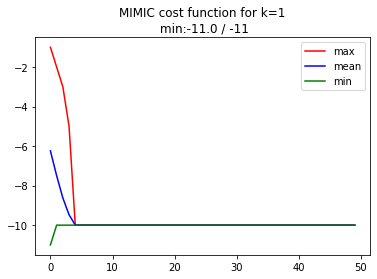

MIMIC: 100%|██████████| 50/50 [00:00<00:00, 275.83it/s]


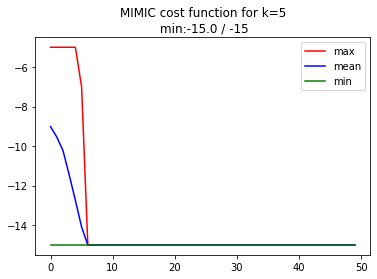

MIMIC: 100%|██████████| 50/50 [00:00<00:00, 299.25it/s]


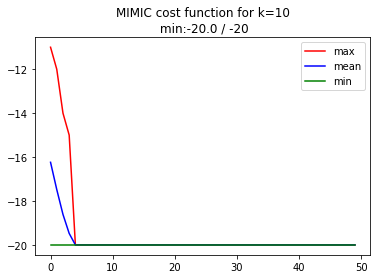

In [33]:
test(10)

MIMIC: 100%|██████████| 50/50 [00:01<00:00, 35.93it/s]


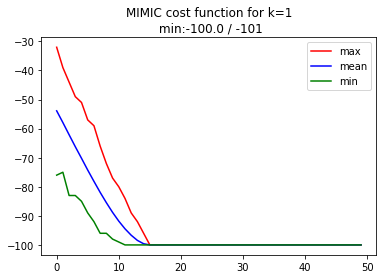

MIMIC: 100%|██████████| 50/50 [00:01<00:00, 33.10it/s]


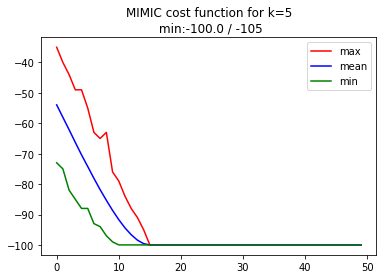

MIMIC: 100%|██████████| 50/50 [00:01<00:00, 31.95it/s]


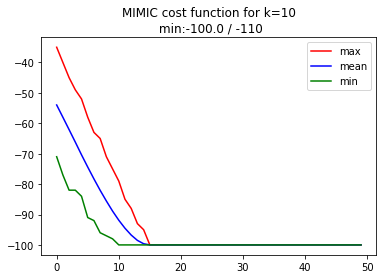

In [34]:
test(100)

MIMIC: 100%|██████████| 50/50 [00:15<00:00,  3.23it/s]


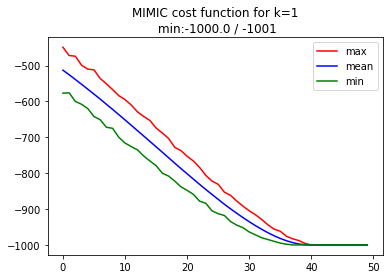

MIMIC: 100%|██████████| 50/50 [00:15<00:00,  3.13it/s]


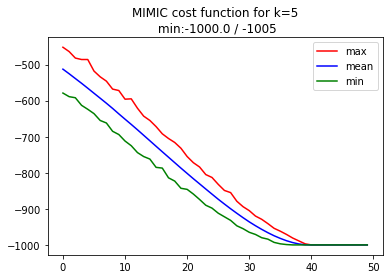

MIMIC: 100%|██████████| 50/50 [00:15<00:00,  3.25it/s]


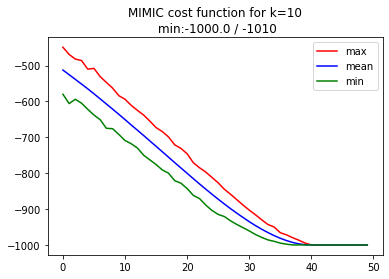

In [35]:
test(1000)